11
[0. 0. 1.]
[-0.35355339  0.61237244  0.70710678]
[-0.35355339 -0.61237244  0.70710678]
[ 7.07106781e-01 -1.73191211e-16  7.07106781e-01]
[-5.00000000e-01  8.66025404e-01  6.12323400e-17]
[-5.00000000e-01 -8.66025404e-01  6.12323400e-17]
[ 1.0000000e+00 -2.4492936e-16  6.1232340e-17]
[-0.35355339  0.61237244 -0.70710678]
[-0.35355339 -0.61237244 -0.70710678]
[ 7.07106781e-01 -1.73191211e-16 -7.07106781e-01]
[ 1.2246468e-16  0.0000000e+00 -1.0000000e+00]
inside loop 99999 0.05 1 2
0
Building the Y matricx
Building the H matrix
reforming the matrix for solving 
End of kcount loop
End Monte Carlo Loop, mcount: 2 ERR =  (14309.589488744423+0j)
Print out the E-vectors
NUSE 117
58.81944394111633
[[ 8.23317619e-01-3.29223550e-01j  2.47563132e-02+1.91252773e-02j
   3.21263585e-02+4.26670224e-02j]
 [ 9.09123306e-01+1.43791107e-02j  1.96795596e-02+3.03907426e-02j
  -3.59877520e-03+4.03321150e-02j]
 [ 8.31057578e-01+3.73929466e-01j  2.83124697e-02+2.08691201e-02j
  -4.28079628e-02+1.82537598e-0

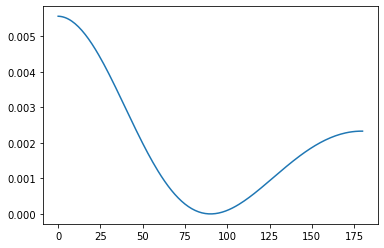

In [110]:
from numpy.linalg import norm, solve
import numpy as np
from matplotlib import pyplot as plt
from random import uniform
from math import pi
import cmath as cm
from collections import Counter
import json
import time
from numpy import arange,array,pi,cos,sin,copy,sqrt

#VGFIN = input("Enter vgfin input file name: ")
#VGFKV = input("Enter vgfkv input file name: ")
#OUTFILE = input("Enter output file name: ")

VGFIN = "yo"
VGFKV = "mama"
OUTFILE = "hi"

    
    #def __init__(self,mcount,kth,kph,NK,divd,khatN,alpha,beta):       
        #self.theta = theta                    
        #self.phi = phi
        #self.mcount = mcount
        #self.kth = kth
        #self.kph = kph
        #self.NK = NK
        #self.divd = divd
        #self.khatN = khatN
        #self.alpha = alpha   # only adding to test the thetas and phis 
        #self.beta = beta     # that arnt in an array
    
def vectors(theta,phi):
    khat = np.zeros(3)
    #khat[0] = np.sin(theta)*np.cos(phi)
    #khat[1] = np.sin(theta)*np.sin(phi)
    #khat[2] = np.cos(theta)
        
    khat[0] = np.sin(theta)*np.cos(phi)
    khat[1] = np.sin(theta)*np.sin(phi)
    khat[2] = np.cos(theta)
    return khat
    
def vectors3(mcount,kth,kph,NK,divd):                      
    #khatN = self.khatN
    #kth = self.kth
    #kph = self.kph
    khatN=np.zeros((NK,3)) 
    print(NK)
    for N in range(NK):
        #print(kth[N], kph[N], "test")
        khatN[N][0]=np.sin(kth[N])*np.cos(kph[N]) 
        khatN[N][1]=np.sin(kth[N])*np.sin(kph[N])
        khatN[N][2]=np.cos(kth[N])
        print(khatN[N])
    return khatN
    
def move1KV(mcount,kth,kph,NK,divd,khatN):
    THinc = np.pi/divd                 
    PHinc = 2*THinc                    
    temp1 = THinc*uniform(-1,1) 
    temp2 = PHinc*uniform(-1,1)

            
    kth[mcount] = kth[mcount]+ temp1
    kph[mcount] = kph[mcount] + temp2 
        
    if (kth[mcount] > np.pi):
        kth[mcount] = 2*np.pi-kth[mcount]
    if (kph[mcount] > np.pi*2):
        kph[mcount] = kph[mcount]-np.pi*2
    if (kth[mcount] < 0.0):
        kth[mcount] = -kth[mcount]
    if (kph[mcount] < 0.0):
        kph[mcount] = -kph[mcount]
         
    khatN[mcount]= vectors(kth[mcount], kph[mcount])
        
    return kth, kph, khatN 

        
def ROT(alpha,beta,gamma):
    RRR = np.array(
      [[ cos(alpha)*cos(beta)*cos(gamma)-sin(alpha)*sin(gamma),
         sin(alpha)*cos(beta)*cos(gamma)+cos(alpha)*sin(gamma),
        -sin(beta)*cos(gamma)],
       [-cos(alpha)*cos(beta)*sin(gamma)-sin(alpha)*cos(gamma),
        -sin(alpha)*cos(beta)*sin(gamma)+cos(alpha)*cos(gamma),             
         sin(beta)*sin(gamma)],
        [cos(alpha)*sin(beta),
         sin(alpha)*sin(beta),
         cos(beta)]])
    return RRR

def dd(alpha,i,beta,j):
    dd=0.0
    if ((alpha == beta) and (i == j)):
        dd=1.0
    return dd
    
def delta(alpha,beta):
    d=0.0
    if (alpha == beta ):
        d=1.0
    return d

def GAM(R,d,k,EPS,a,i,b,j):
    GAM=0.0+0.0j
    kd=k*d
    b1=(3./(4.*np.pi))**(2./3.)
    GAM=b1*(kd)**2 + 1j*kd**3/(2.*np.pi)          
    return GAM
    
def GG(R,k,d,EPS,a,i,b,j):
        
    PHZ = 0.0+0.0j
    t1 = 0.0+0.0j
    t2 = 0.0+0.0j
    temp = 0.0+0.0j
    ci = 0.0+1.0j

    K2= k * k 
    
    #print(dtemp)   
    Rab = np.zeros(3)
    
    Rhat = np.zeros(3)
    if not b == a:
            
            
        Rab[0] = R[a][0] - R[b][0]
        Rab[1] = R[a][1] - R[b][1]
        Rab[2] = R[a][2] - R[b][2]
            
        RMAG = Rab[0]**2 + Rab[1]**2 + Rab[2]**2 
        RMAG = RMAG**0.5
        Rhat[0] = Rab[0]/RMAG
        Rhat[1] = Rab[1]/RMAG
        Rhat[2] = Rab[2]/RMAG
            
        temp = ci*k*RMAG
        PHZ = np.exp(temp)
        t1 = (K2/RMAG)*(delta(i,j) - Rhat[i]*Rhat[j])
        t2 = (ci*k/RMAG**2 - 1.0/RMAG**3) * (delta(i,j)-3.0*Rhat[i]*Rhat[j])
        G = PHZ * (t1 + t2)
    else:    
        G = 4.0*np.pi*GAM(R,d,k,EPS,a,i,b,j)/(3.0*d**3)
    return G

def CPSI(R,khatN,k,mm,N,b):
    
    KDR=khatN[N].dot(R[b])
    temp = 1j*mm*k*KDR 
    #print("k",k)
    return np.exp(temp)

def print_GG_to_file(R, k, eps):
    print("Printing GG data to GG_file.txt")
    dtemp = 1.24
    with open('GG_file.txt','w') as Gf:
        for a in range(NUSE):
            for i in range(3):
                for b in range (NK):
                    for j in range(3):
                        temp = str(a)+", "+str(i)+", "+str(b)+", "+str(j)
                        temp = temp + ", " + str(GG(R,k,dtemp,eps,a,i,b,j))+"\n" 
                        Gf.write(temp)            # write a whole line
                        # End of the j loop         
                    # End of the N loop
            # End of the a loop
       # End of file open

def ecalc(R,khatN,k,mm,NUSE,An,x,NK, E) :
        
    F = np.zeros((NUSE, 3),dtype=complex)
    for b in range(0,NUSE):
        for l in range(3):
            F[b][l]=(0.0)
            for N in range(0,NK):
                F[b][l]=F[b][l]+ An[N][l]*CPSI(R,khatN, k, mm, N, b)          
     
        #E = np.zeros((NUSE,3),dtype=complex)
    for m in range(0,NUSE):
        for I in range(3):
            E[m][I]=F[m][I]/(1.+(4.*np.pi)* x/3.)
        #
    return E


def Calculate_T1_Matrix(D, R, k, khatN, EPS, mm, w, NUSE, NK):  
    for a in range(NUSE):
        for i in range(3):
            for N in range (NK):
                for j in range(3):
                    T1[a][i][N][j] = 0.0+0.0j
                    for b in range (NUSE):
                        dtemp = D[b]
                        T1[a][i][N][j] =  T1[a][i][N][j] + (dd(a,i,b,j)- D[b]**3 * w * GG(R,k,dtemp,EPS,a,i,b,j)) * CPSI(R,khatN, k, mm, N, b)
                        #print(a, i, N, j, b, D[b],dd(a,b,i,j), w, GG(R,dtemp,k,eps,a,i,b,j), CPSI(R,khatN, k, mm, N, b) )
                        #print(dd(a,i,b,j), D[b], GG(R,k,dtemp,EPS,a,i,b,j), CPSI(R,khatN, k, mm, N, b), T1[a][i][N][j])       
    return T1

def Calculate_Y_Matrix(T1, E0, NUSE, NK):
    print('Building the Y matricx')
    for M in range(NK):
        for l in range(3):
            Y[M][l] = 0.0 + 0.0j    
            for a in range(NUSE):
                for i in range(3):
                    #T = T_Matrix(D, R, k, khatN, eps, mm, w, NUSE, NK,dirac,greens,efield,T1)
                    #T1 = T.Calculate_T1_Matrix()
                    Y[M][l] = Y[M][l] + np.conjugate(T1[a][i][M][l])*E0[a][i]
    return Y

def Calculate_H_Matrix(T1, NK, NUSE):
    print('Building the H matrix')
    for M in range (NK):
        for l in range (3):
            for N in range(NK):
                for j in range(3):
                    H[M][l][N][j] = complex(0,0)
                    for a in range(NUSE):
                        for i in range(3):
                            #T = T_Matrix(D, R, k, khatN, eps, mm, w, NUSE, NK,dirac,greens,efield,T1)
                            #T1 = T.Calculate_T1_Matrix()
                            H[M][l][N][j] =  H[M][l][N][j] + np.conjugate(T1[a][i][M][l]) * (T1[a][i][N][j])
    return H 

def Reform_Y_H_Matricies(Y, H, NK, bb, aa):
    print('reforming the matrix for solving ')
    for n in range(NK):
        for i in range(3):
            m = 3*(n)+i 
            bb[m] = Y[n][i]
                
            for l in range (NK):
                for j in range (3):
                    p = 3*(l)+j
                    aa[m][p] = H[n][i][l][j]
                        
                    #j += 1
                #l += 1
            #i += 1
        #n += 1
            
    return aa, bb

def Calculate_Phi(An, H, Y, E0, NK, NUSE):
    CPHI=0.0+0.0j
    for N in range(0,NK):
        for j in range(0,3):
            for M in range(0,NK):
                for l in range (0,3):
                    CPHI = CPHI + np.conjugate(An[M][l]*H[M][l][N][j]*An[N][j])
             
    for j in range (3):
        for N in range (0, NK):
            CPHI = CPHI - (np.conjugate(Y[N][j])*An[N][j]                     \
                       +Y[N][j]*np.conjugate(An[N][j]))
      
    for a in range(NUSE):
        for i in range(3):
            CPHI - CPHI + E0[a][i]*np.conjugate(E0[a][i])       
    return CPHI

def diff_cross_sect(E, R, W, X, D, RRR, RAD):
    NDATA = 181  # number of angles to use
    THDeg = np.zeros(NDATA)
    PHDeg = np.zeros(NDATA)
    diff_cross_sect_H = np.zeros(NDATA)
    diff_cross_sect_V = np.zeros(NDATA)
    V = np.zeros(3)
    THhat = np.zeros(3)
    PHhat = np.zeros(3)
    temp=0.0+0.0j
    CI = 0.0 + 1.0j
    PA2 = 1/(np.pi*RAD*RAD)
    #Do the main calculation of the scattering amplitude            ***
    PH=0.0 # for now
    #Loop over angle (rad)                                         ***
    for IANG in range (0,NDATA):
         TH = np.pi*IANG/(NDATA - 1.0)
         #define THhat and PHhat, and rotate them into prime frame    ***
         V[0]= np.cos(TH)*np.cos(PH)
         V[1]= np.cos(TH)*np.sin(PH)
         V[2]=-np.sin(TH)
         THhat = RRR.dot(V)
         V[0]=-np.sin(PH)
         V[1]= np.cos(PH)
         V[2]= 0
         PHhat = RRR.dot(V)
         #THhat and PHhat are now really primed,but drop prime        ***         
         #calculate r-hat prime direction for the given theta         ***
         V[0] = np.sin(TH)*np.cos(PH)
         V[1] = np.sin(TH)*np.sin(PH)
         V[2] = np.cos(TH)
         Rhat = RRR.dot(V)
         # Now loop over each dipole cell
         fh = 0.0 + 0.0j
         fv = 0.0 + 0.0j
         K = 2.0*np.pi/W
         K2 = K*K
         K3 = K2*K
         for mu in range (0, NUSE):
             RDOT = 0.0
             #calculate rhatprime dot rprime for the exponential
             for j in range (0,3):
                 RDOT = RDOT + R[mu][j]*Rhat[j]
             #calculate all factors that don't depend on i and j       ***
             temp = -CI*K*RDOT
             C = CI*K3*X*D[mu]**3*np.exp(temp) 
             #now put the scattering amplitude together                ***
             TDE = 0.0 + 0.0j
             PDE = 0.0 + 0.0j
             #calculate THhat dot E and PHhat dot E
             for I in range(0,3):
                 TDE = TDE + THhat[I]*E[mu][I]
                 PDE = PDE + PHhat[i]*E[mu][I]

             #now put the scattering amplitude together                ***            
             fh = fh + C * TDE
             fv = fv + C * PDE
         #separate into _H_orizontal and _V_ertical components and    ***
         #at the same time convert to diff. scat. cross section (/K2) *
         HOR = (fh*np.conjugate(fh))/K2
         VER = (fv*np.conjugate(fv))/K2
         #normalize and and return
         THDeg[IANG] = np.degrees(TH)
         PHDeg[IANG] = np.degrees(PH)
         # HOR and VER should now be real, but are of type complex
         # Python is happier if we explicitly remove the complex zero part
         diff_cross_sect_H[IANG] = np.real(HOR)*PA2
         diff_cross_sect_V[IANG] = np.real(VER)*PA2
         #print(E, R, W, X, D, RRR, RAD)
    return THDeg, PHDeg, diff_cross_sect_H, diff_cross_sect_V, NDATA


startTime=time.time()

DEG = np.pi/180.0
CI = (0.0,1.0)
nmax = 2000
kmax = 2000
mmax = 2
ERR0 = 0.05
#jcount = 0
divd = 100
#d1 = 0

with open("/Users/madisonderosier/Desktop/Research/" + VGFIN + ".txt",'r')as fp:    # Read in VGFIN file
    variable=fp.read()
    vgfin=json.loads(variable)
    
wave = int(vgfin["Wavelength"])                    # This just reads in each individual variable and
alpha = int(vgfin["Incident theta angle"])         #     asigns them the variable that will be used
beta = int(vgfin["Value for phi"])                 #     to call them in the functions in this code
gamma = int(vgfin["Value for gamma"])
psi = int(vgfin["Polarization angle"])
RAD = float(vgfin["Particle symmetry semi-axes"])
#eps = complex(vgfin["EPS"])
er = float(vgfin["ER"])
ei = float(vgfin["EI"])
td = float(vgfin["TD"])
R = np.array(vgfin["R-vector"])
D = np.array(vgfin["D-vector"])
nsid = int(vgfin["Number of dipoles along major axes"])
nlsid = int(vgfin["Number of fine structure devisions per dipole cell side"])
mr = float(vgfin["Real part of index of refraction"])
mi = float(vgfin["Imaginary part of index of refraction"])
NUSE = int(vgfin["Counter"])

#print(R)
#print(R[0][0])
 
#d2 = []
#for i in range(1,NUSE): 
                                        # This is supposed to be the loop that calls in each 
    #R1 = R[i][0]  
    #R2 = R[i][1]
    #R3 = R[i][2]                        #     set of (x,y, and z) components of R and D in order
    #dsum = D[i]                   #     to calculate the total volume of the particle 
    #d1 = d1 + dsum**3 
    #d2.append(d1)
                               # Its currently commented out because it was returning ani+= 1                       #     error saying there were too many values in the R array?
                                 #     so I was very confused but wanted to make sure the rest of the code worked.
kth = np.zeros(kmax)                  # make arrays for the kvector components
kph = np.zeros(kmax)
khatN = np.zeros((kmax,3))

with open("/Users/madisonderosier/Desktop/Research/" + VGFKV + ".txt",'r')as fp:   # Read in VGFKV
    variable=fp.read()
    vgfkv=json.loads(variable)
    
kth = np.array(vgfkv["Theta angle"])
kph = np.array(vgfkv["Phi angle"])
lastLine = np.array(vgfkv["Last Line"])
NK = vgfkv["Count"]
#mc = np.array(vgfkv["CountList"])
#mcount = mc.tolist()

ERR = lastLine[0]
ERRlast = lastLine[0]
kcount = lastLine[2]
mcount = lastLine[3]

khatN = vectors3(mcount,kth,kph,NK,divd)
#print(khatN)

#dtemp = d2[-1]
k = (2.0 * pi)/ wave            # Defines k
alpha = alpha*DEG               # The following makes the following variables in terms of radians
beta = beta*DEG
gamma = gamma*DEG
psi = psi*DEG
#theta = theta*DEG
#phi = phi*DEG

EPS = complex(er,ei)
mm = np.sqrt(EPS)
x = 0+0j
x = (EPS - 1.0)/(4.0* np.pi)
w = x/(1.0 + (4.0 * np.pi / 3.0) * x)

RRR = ROT(alpha,beta,gamma)                 # Successfully executed!

                     
#ddelta = dd(alpha,beta,i,j)
#delta = delta(alpha,beta,i,j)


#GAM = GAM(R,dtemp,k,EPS,alpha,i,beta,j)
#G = GG(R,dtemp, k, eps, alpha, i, beta, j)

       # Do I need to include N and b?               
#E = ecalc(R,khatN,k,mm,NUSE,An,x,NK,E)


v = np.zeros(3)
v[0] = 0.0
v[1] = 0.0
v[2] = 1.0
khat = RRR.dot(v)

v[0] = np.cos(psi)
v[1] = np.sin(psi)
v[2] = 0.0
E0hat = RRR.dot(v)

E0 = np.zeros((NUSE,3),dtype=complex)

temp = 0+0j
C = 0+0j

for i in range(NUSE):
    RDK = np.dot(khat,R[i])
    temp = 1j * k * RDK
    C = np.exp(temp)
    E0[i] = C * E0hat

An = np.zeros((NK,3),dtype=complex) 
T1 = np.zeros((NUSE,3,NK,3),dtype=complex)
E = np.zeros((NUSE,3),dtype=complex)

F = np.zeros((NUSE,3),dtype=complex)
Y = np.zeros((NK,3),dtype=complex)
H = np.zeros((NK, 3, NK,3),dtype=complex)
aa = np.zeros((3*NK,3*NK),dtype=complex)
bb = np.zeros((NK*3),dtype=complex)
xx = np.zeros((3*NK), dtype = complex)

#print ("Calculating the phase function")
#[TH, PH, diff_cross_sect_H, diff_cross_sect_V,NANG] = diff_cross_sect(E, R, w, x, D, RRR, RAD)
    
# Monte Carlo Loop (I Believe)
#print(ERR, ERR0, jcount, mmax)
while (ERR > ERR0) and (mcount < mmax):
    print("inside loop", ERR, ERR0, mcount, mmax)
    for kcount in range(1):
        print(kcount)
        #khat = vectors(kth,kph)               
        #khatN = vectors3(mcount,kth,kph,NK,divd)
        #kth,kph,khatN = move1KV(mcount,kth,kph,NK,divd, khatN)
        T1 = Calculate_T1_Matrix(D,R,k,khatN,EPS,mm,w,NUSE,NK)
        #print(D,R,k,khatN,EPS,mm,w,NUSE,NK)
        #print(T1)
        #print(vectors3(mcount,kth,kph,NK,divd))
        
        
        Y = Calculate_Y_Matrix(T1,E0,NUSE,NK)
        #print(Y)
        
        
        H = Calculate_H_Matrix(T1,NK, NUSE)
        #print(H)
        
        
        aa, bb = Reform_Y_H_Matricies(Y,H,NK,bb,aa)
        #print(aa,bb)
        
        xx = np.linalg.solve(aa,bb)
        #print(xx)
        
        for N in range(NK):
            for i in range(3):
                M = 3*(N-0)+i
                An[N][i] = xx[M]
        
        
        Phi = Calculate_Phi(An, H, Y, E0, NK, NUSE)
        #print(Phi)
        
        ERR = Phi * np.conjugate(Phi)
        
        if (ERR>ERR0):
            if (ERR > ERRlast):
                ERRlast = ERR
                khatN = vectors3(mcount,kth,kph,NK,divd, khatN)
                
            else: 
                
                ERRlast = ERR
                E = ecalc(R,khatN,k,mm,NUSE,An,x,NK,E)
                
                if(kcount < NK):
                    kth, kph, khatN = move1KV(mcount,kth,kph,NK,divd, khatN)
        
        else:
            
            E = ecalc(R,khatN,k,mm,NUSE,An,x,NK,E)
            break
            
    print('End of kcount loop')
    
    mcount += 1
    print('End Monte Carlo Loop, mcount:', mcount,'ERR = ', ERR)
    
print('Print out the E-vectors')
#print(E)
print('NUSE', NUSE)

#print(a,i,N,j,b,dd(a,i,b,j),D[b],w,GG(R,k, dtemp,eps,a,i,b,j),CPSI(R,khatN, k, mm, N, b))

endTime = time.time()

print(endTime - startTime)

# End of VGFFMC
#
### Now let's try for the scattering differential cross section or "phase function"

[TH, PH, diff_cross_sect_H, diff_cross_sect_V,NANG] = diff_cross_sect(E, R, wave, x, D, RRR, RAD)
print(E, R, wave, x, D, RRR, RAD)

for i in range (0,NANG):
    print(TH[i], PH[i], diff_cross_sect_V[i], diff_cross_sect_H[i])

#print_Phz_to_file(TH, PH, diff_cross_sect_V, diff_cross_sect_H,NANG)
plt.plot(TH, diff_cross_sect_H)
plt.show()
# And that is the end of the program